In [1]:
import pandas as pd

# Load the dataset
cirrhosis_data_original = pd.read_csv('cirrhosis.csv')

# Display the first few rows of the dataset
cirrhosis_data_original.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [2]:
#Inspect Dataset Dimensions and Columns
print("Number of Rows:", cirrhosis_data_original.shape[0])
print("Number of Columns:", cirrhosis_data_original.shape[1])
print("\nColumns in the Dataset:", cirrhosis_data_original.columns)

Number of Rows: 418
Number of Columns: 20

Columns in the Dataset: Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


In [4]:
#Check Missing Values
missing_values = cirrhosis_data_original.isnull().sum()
print(missing_values)


ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [5]:
#Summary Statistics for Numerical Attributes
summary_stats = cirrhosis_data_original.describe()
print(summary_stats)


               ID       N_Days           Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000    418.000000  418.000000   284.000000   
mean   209.500000  1917.782297  18533.351675    3.220813   369.510563   
std    120.810458  1104.672992   3815.845055    4.407506   231.944545   
min      1.000000    41.000000   9598.000000    0.300000   120.000000   
25%    105.250000  1092.750000  15644.500000    0.800000   249.500000   
50%    209.500000  1730.000000  18628.000000    1.400000   309.500000   
75%    313.750000  2613.500000  21272.500000    3.400000   400.000000   
max    418.000000  4795.000000  28650.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  310.000000    312.000000  312.000000     282.000000   
mean     3.497440   97.648387   1982.655769  122.556346     124.702128   
std      0.424972   85.613920   2140.388824   56.699525      65.148639   
min      1.960000    4.000000    289.000000   

In [6]:
# Displaying the distribution of categorical attributes like 'Status', 'Drug', etc.
for col in ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']:
    print(cirrhosis_data_original[col].value_counts())
    print('-'*50)


C     232
D     161
CL     25
Name: Status, dtype: int64
--------------------------------------------------
D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64
--------------------------------------------------
F    374
M     44
Name: Sex, dtype: int64
--------------------------------------------------
N    288
Y     24
Name: Ascites, dtype: int64
--------------------------------------------------
Y    160
N    152
Name: Hepatomegaly, dtype: int64
--------------------------------------------------
N    222
Y     90
Name: Spiders, dtype: int64
--------------------------------------------------
N    354
S     44
Y     20
Name: Edema, dtype: int64
--------------------------------------------------


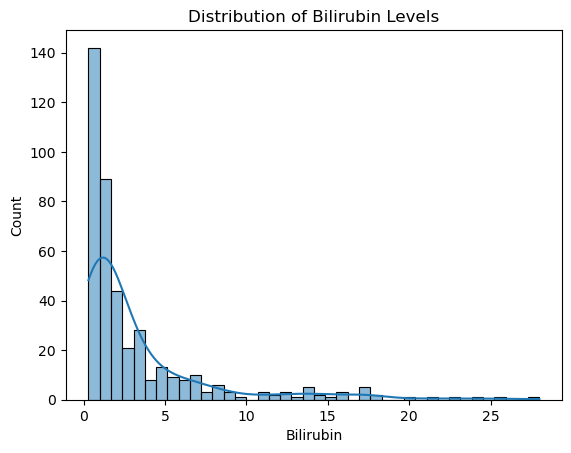

In [7]:
#Visualize Distributions for key Numerical Features
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for 'Bilirubin' levels
sns.histplot(cirrhosis_data_original['Bilirubin'], kde=True)
plt.title('Distribution of Bilirubin Levels')
plt.show()


C:\Users\haziq\AppData\Local\Temp\ipykernel_13748\1006539407.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cirrhosis_data_original.corr()


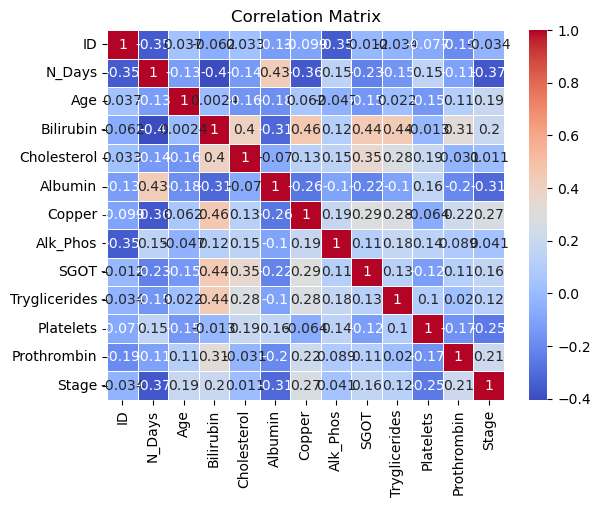

In [8]:
#Correlation Matrix
correlation_matrix = cirrhosis_data_original.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [9]:
#Impute Missing Values
from sklearn.impute import SimpleImputer

# Numerical imputer
num_imputer = SimpleImputer(strategy='median')
cirrhosis_data_original[['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']] = num_imputer.fit_transform(
    cirrhosis_data_original[['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']])

# Categorical imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
cirrhosis_data_original[['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']] = cat_imputer.fit_transform(
    cirrhosis_data_original[['Drug', 'Ascites', 'Hepatomegaly', 'Spiders']])


In [10]:
#Encoding Catagorical Values
#Label Encoding for Binary Catagories
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']:
    le = LabelEncoder()
    cirrhosis_data_original[col] = le.fit_transform(cirrhosis_data_original[col])
    label_encoders[col] = le
# One-Hot Encoding for Multi Catagorical Values
cirrhosis_data_original = pd.get_dummies(cirrhosis_data_original, columns=['Drug', 'Status'])


In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cirrhosis_data_original[['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                                                                'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']])
cirrhosis_data_original[['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides',
                         'Platelets', 'Prothrombin']] = scaled_features


In [12]:
#Feature Engineering
#Interaction Between age and other features
cirrhosis_data_original['Age_Bilirubin'] = cirrhosis_data_original['Age'] * cirrhosis_data_original['Bilirubin']
cirrhosis_data_original['Age_Albumin'] = cirrhosis_data_original['Age'] * cirrhosis_data_original['Albumin']

#Interaction Between Drug and Other Enzymes
cirrhosis_data_original['Drug_Placebo_SGOT'] = cirrhosis_data_original['Drug_Placebo'] * cirrhosis_data_original['SGOT']
cirrhosis_data_original['Drug_Placebo_Alk_Phos'] = cirrhosis_data_original['Drug_Placebo'] * cirrhosis_data_original['Alk_Phos']

#Polynomial Features
# Quadratic features for certain variables
cirrhosis_data_original['Bilirubin_squared'] = cirrhosis_data_original['Bilirubin'] ** 2
cirrhosis_data_original['Albumin_squared'] = cirrhosis_data_original['Albumin'] ** 2
cirrhosis_data_original['Cholesterol_squared'] = cirrhosis_data_original['Cholesterol'] ** 2

#Check Dataset after feature Engineering
cirrhosis_data_original.head()


,ID,N_Days,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,...,Status_C,Status_CL,Status_D,Age_Bilirubin,Age_Albumin,Drug_Placebo_SGOT,Drug_Placebo_Alk_Phos,Bilirubin_squared,Albumin_squared,Cholesterol_squared
0,1,400,0.768941,0,1,1,1,2,2.562152,-0.462810,...,0,0,1,1.970144,-1.625769,0.000000,-0.000000,6.564625,4.470246,0.214193
1,2,4500,0.546706,0,0,1,1,0,-0.481759,-0.250257,...,1,0,0,-0.263380,0.827613,-0.000000,0.000000,0.232092,2.291646,0.062628
2,3,1012,1.852567,1,0,0,0,1,-0.413611,-0.903470,...,0,0,1,-0.766243,-0.076118,-0.000000,-0.000000,0.171074,0.001688,0.816257
3,4,1925,0.383244,0,0,1,1,1,-0.322748,-0.550942,...,0,0,1,-0.123691,-0.864464,-0.000000,0.000000,0.104167,5.087960,0.303537
4,5,1504,-1.210972,0,0,1,1,0,0.040704,-0.369494,...,0,1,0,-0.049291,-0.092892,-0.151226,-0.602359,0.001657,0.005884,0.136526


In [13]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = cirrhosis_data_original.drop(['ID', 'Stage'], axis=1)
y = cirrhosis_data_original['Stage']

# Split data into train+validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Split train+validation data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)


In [14]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=5000, random_state=42)

In [15]:
#Evaluating Model Cost
# Predict the probability of each class for the validation set
y_val_probs = log_reg.predict_proba(X_val)

# Calculate the log loss
cost = log_loss(y_val, y_val_probs)

print("Cost (Log Loss) on the Validation Set:", cost)


Cost (Log Loss) on the Validation Set: 1.078642413123491


In [17]:
#Predicting  Accuracy
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_test_pred = log_reg.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)



Test Accuracy: 0.42857142857142855


In [21]:
#Random forest
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train, y_train)

# Predict the labels for the test set
y_test_pred_rf = random_forest.predict(X_test)

# Evaluate the accuracy of the Random Forest on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Test Accuracy with Random Forest:", test_accuracy_rf)



Test Accuracy with Random Forest: 0.40476190476190477


In [34]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
# Check the number of NaN values in each target dataset
nan_count_train = y_train.isnull().sum()
nan_count_val = y_val.isnull().sum()
nan_count_test = y_test.isnull().sum()

print(f"NaN values in y_train: {nan_count_train}")
print(f"NaN values in y_val: {nan_count_val}")
print(f"NaN values in y_test: {nan_count_test}")

# Given that NaN values are problematic for our models, we can choose to either:
# 1. Remove these rows
# 2. Impute these NaN values (e.g., with the mode of the target column)

# Here, we'll choose to impute using the mode:
mode_train = y_train.mode()[0]

y_train.fillna(mode_train, inplace=True)
y_val.fillna(mode_train, inplace=True)
y_test.fillna(mode_train, inplace=True)

# Initialize and train the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict the labels for the test set using Gradient Boosting
y_test_pred_gb = gb_classifier.predict(X_test)

# Calculate test accuracy
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)

test_accuracy_gb



NaN values in y_train: 117
NaN values in y_val: 10
NaN values in y_test: 17


0.8333333333333334